In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
merged_df = pd.read_csv("D:/Python/Machine Learning/Research/MergedDF.csv")
pd.set_option('display.max_columns', None)
merged_df.head()

,A. Batch Nbr,Cell Assembly Date,Cell Assembly Notes,Cell Assembly Operator,C. Batch Nbr,Cell C. Mass _g_,Cell Number,Separator Composition,Cell Dry weight _g_,Electrolyte Formulation,electrolyte _g_,Electrolyte _ml_,Fresh Imp Date,Fresh Imp Pass_Fail_Warn,Fresh Impedance _m?_,Lid seal,Fresh OCV _V_,Fresh OCV Pass_Fail,Electrolyte fill Operator,Cell Wet Weight _g_,Electrolyte Fill Notes,_1_wk_imp__m?_,_1wk_OCV__V_,Wk 1 Imp Pass_Fail_Warn,Wk 1 OCV_Pass_fail_warn_,_2_wk_imp__m?_,_2_wk_OCV__V_,_2_wk_Imp_Pass_Fail_Warn,_2_wk_OCV_Pass_fail_warn_,_3_wk_imp__m?_,_3wk_OCV__V_,_4_wk_OCV,_4_wk_Imp_m?_,Dismantle Anode Color,Dismantle Anode Dendrites Bottom of stack,Dismantle Cathode Color,Dismantle Cathode Precipitate,Dismantle Cathode Texture,Dismantle Cell diameter_middle,Dismantle Cell Swollen,Dismantle Cellophane Color,Dismantle Clear sign of Hard short,Dismantle Color of dendrites Bottom of stack,Dismantle Color of Dendrites Sides of stack,Dismantle Color of dendrites Top of Stack,Dismantle Current Collector Color _ Anode,Dismantle Dendrite Distribution,Dismantle Operator,Dismantle Electrolyte Color,Dismantle Lid Leaks,Dismantle Notes,Dismantle OCV,Dismantle Pellon Color,Dismantle Pellon Precipitate,Dismantle Quantity of Electrolyte,Dismantle Dendrites Sides of Stack,Dismantle spin stop in place,Dismantle Tab Color _ Anode,Dismantle Tab_to_mesh Weld Check,Dismantle Tab_to_terminal Weld Check,Dismantle Terminal gasket leaks,Dismantle Dendrites Top of Stack,UEP cell ID,Cell A. Mass g,Dismantle Image 1,Dismantle Image 2,Dismantle Image 3,Dismantle Image 4,Dismantle Image 5,Dismantle Image 6,Dismantle Image 7,Dismantle Image 8,Dismantle Image 9,Dismantle Image 10,Dismantle Image 11,Dismantle Image 12,Cell Performance Data,Cell Assembly Can diameter_middle,Jelly roll OD in,Theo Void Volume,Can ID in,Active Area sqin,Cathode Loading_minus CC,Capacity,Anode Tabs Aligned,Cathode Tabs Aligned,Tape Brand Make,Heat Seal,Average Fresh OCV,Average Fresh Imp,Cell Dry weight _g_ Average,Cell Wet Weight _g_ Average,electrolyte _g_ Average,Fresh Impedance _m?_ Standard Deviation,electrolyte _g_ Standard Deviation,Cell Wet Weight _g_ Standard Deviation,Cell Dry weight _g_ Standard Deviation,Fresh OCV _V_ Standard Deviation,_1_wk_imp__m?_ Average,_1_wk_imp__m?_ Standard Deviation,_1wk_OCV__V_ Average,_1wk_OCV__V_ Standard Deviation,_2_wk_imp__m?_ Average,_2_wk_imp__m?_ Standard Deviation,_2_wk_OCV__V_ Average,_2_wk_OCV__V_ Standard Deviation,_3_wk_imp__m?_ Average,_3_wk_imp__m?_ Standard Deviation,_3wk_OCV__V_ Average,_3wk_OCV__V_ Standard Deviation,_4_wk_OCV Average,_4_wk_OCV Standard Deviation,_4_wk_Imp_m?_ Average,_4_wk_Imp_m?_ Standard Deviation,Performance Temp C,Cell Bar Code,Cell Bar Code Text,Lid glue Date,Leak test,Terminal Bend and Potting date,Assembly Sumamary Date,Tab Terminal Welding,Lid Gluing,Terminal Gluing,Terminal Bending,Light cure and terminal Potting,Leak (Pressure) Test,Cell Continuity test,Completed cells,Tab Terminal Weld fails nickel,Tab Terminal Weld fails Copper,Lid gluing fails,Terminal potting fails nickel,Terminal potting fails copper,Terminal Bending fails nickle,Terminal Bending fails copper,Leak _Pressure_test fails,Continuity fails_long beep,Light cure app on lid,Light cure app on lid fails,Cell A. Mass g Average,Cell A. Mass g Standard Deviation,Winder Continuity Test,Tab Terminal Welding Notes,Lid Gluing,Terminal Bending Notes,Leak test notes,Cell continuity notes,Winds_good,Rewinds,Winds_good notes,Cell Number bar code,Cell Number text,Field,Field 2,Dismanlte Date,C. Batch barcode,A. Batch barcode,C. Batch text,A. Batch text,Cell Barcode,Cell Nbr text,Lid Continuity,Wt Pasta + 2 oz cup,Tenths of mm,mm penetration,C penetrometer notes,C penetrometer Wt,Packing Date,Packing Operator,Packing notes,Cell Roll diameter_middle,Jelly roll OD in Average,Jelly roll OD in Standard Deviation,Failure mode,Can Cracked?,tab poker shorts?,Telescoped?,Dry Voltage,Removed from production,Field 216,R1,R2,Date of implementation,Cell 

In [3]:
manufac_df = merged_df[['Cell Assembly Date', 'Cell Assembly Operator', 'A. Batch Nbr', 'C. Batch Nbr', 'Dry Voltage']]
display(manufac_df)
manufac_df.info()

,Cell Assembly Date,Cell Assembly Operator,A. Batch Nbr,C. Batch Nbr,Dry Voltage
0,4/26/2018,Franck,A - 040618,C - 042518,0.200
1,4/26/2018,Franck,A - 040618,C - 042518,0.300
2,4/26/2018,Franck,A - 040618,C - 042418,0.270
3,5/10/2018,Franck,A - 050318,C - 050718,0.200
4,5/10/2018,Franck,A - 043018,C - 050718,0.290
5,5/11/2018,Franck,A - 050218,C - 050918,0.050
6,7/10/2018,Mario,A - 070518,C - 071018,0.370
7,7/10/2018,Mario,A - 070918,C - 071018,0.400
8,7/10/2018,Mario,A - 070918,C - 071018,0.580
9,11/6/2018,Rita,A-103118,C - 103118,0.166


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Cell Assembly Date        24 non-null object
Cell Assembly Operator    24 non-null object
A. Batch Nbr              24 non-null object
C. Batch Nbr              24 non-null object
Dry Voltage               24 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.0+ KB


In [4]:
# labelencoder = LabelEncoder()
# manufac_df.iloc[:, :5] = labelencoder.fit_transform(manufac_df.iloc[:, 0])
# display(manufac_df)

# but I want chronological order

In [5]:
replace1 = {'Cell Assembly Date':{'4/19/2018':1, '4/20/2018':2, '4/26/2018':3, '5/10/2018':4, '5/11/2018':5, '7/10/2018':6, '11/6/2018':7, '12/18/2018':8, '1/9/2019':9, '1/10/2019':10, '1/23/2019':11, '2/6/2019':12}}
replace2 = {'Cell Assembly Operator':{'Franck':1, 'Mario ':2, 'Rita':3}}
replace3 = {'A. Batch Nbr':{'A - 040618': 1, 'A - 040918':2, 'A - 041718':3, 'A - 041918':4, 'A - 043018':5, 'A - 050218':6, 'A - 050318':7, 'A - 070518':8, 'A - 070918':9, 'A-103118':10, 'A - 120318':11, 'A - 010219':12, 'A - 011819':13, 'A - 020519':14}}
replace4 = {'C. Batch Nbr':{'C - 041818': 1, 'C - 041918':2, 'C - 042418':3, 'C - 042518':4, 'C - 050718':5, 'C - 050918':6, 'C - 071018':7, 'C - 103118':8, 'C - 121218':9, 'C - 010319':10, 'C - 010919':11, 'C - 020419':12}}

manufac_df.replace(replace1, inplace = True)
manufac_df.replace(replace2, inplace = True)
manufac_df.replace(replace3, inplace = True)
manufac_df.replace(replace4, inplace = True)
display(manufac_df)
manufac_df.info()

c:\users\raf\pycharmprojects\research\venv\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,Cell Assembly Date,Cell Assembly Operator,A. Batch Nbr,C. Batch Nbr,Dry Voltage
0,3,1,1,4,0.200
1,3,1,1,4,0.300
2,3,1,1,3,0.270
3,4,1,7,5,0.200
4,4,1,5,5,0.290
5,5,1,6,6,0.050
6,6,2,8,7,0.370
7,6,2,9,7,0.400
8,6,2,9,7,0.580
9,7,3,10,8,0.166


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Cell Assembly Date        24 non-null int64
Cell Assembly Operator    24 non-null int64
A. Batch Nbr              24 non-null int64
C. Batch Nbr              24 non-null int64
Dry Voltage               24 non-null float64
dtypes: float64(1), int64(4)
memory usage: 1.0 KB


In [6]:
# scaled = StandardScaler().fit_transform(manufac_df)
# manuscaled_df = pd.DataFrame(scaled, columns = manufac_df.columns)
# display(manuscaled_df)

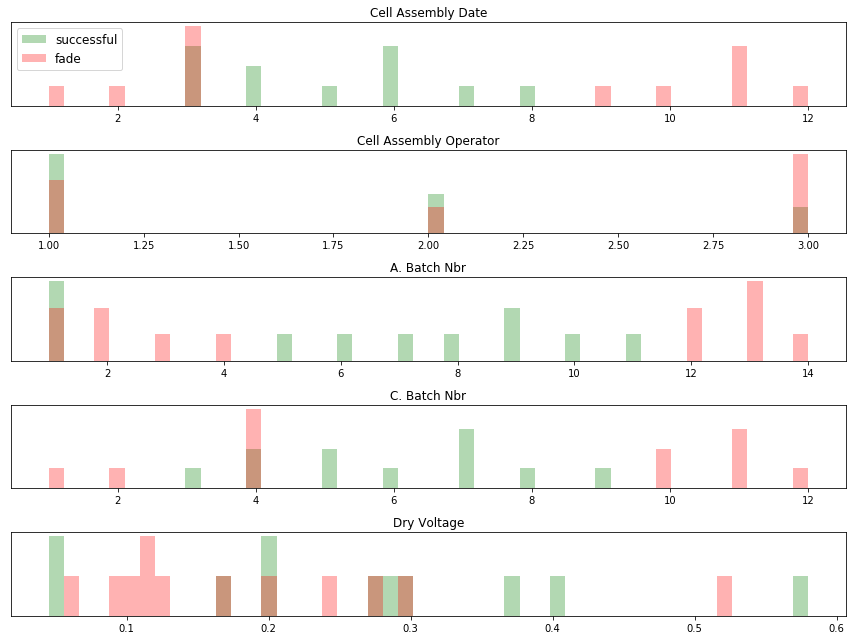

In [7]:
fig, axes = plt.subplots(5, figsize = (12, 9))
ax = axes.ravel()

# bin_range = int(manufac_df.iloc[:, :].max().max() - manufac_df.iloc[:, :].min().min()) + 1

for i in range(5):
    _, bins = np.histogram(manufac_df.iloc[:, i], bins = 50)
    ax[i].hist(manufac_df.iloc[:11, i], bins = bins, color = 'g', alpha = 0.3)
    ax[i].hist(manufac_df.iloc[12:, i], bins = bins, color = 'r', alpha = 0.3)
    ax[i].set_title(manufac_df.columns[i], fontsize = 12)
    ax[i].axes.get_xaxis().set_visible(True)
    ax[i].set_yticks(())
    
ax[0].legend(['successful', 'fade'], loc = 'best', fontsize = 12)
plt.tight_layout()
plt.show()

In [8]:
print(manufac_df.iloc[11, 0])

11
